In [11]:
import os
from datetime import datetime
from time import mktime
import time
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def name_to_datetime(name):
    time_str = "{}_{}".format(name[:-4].split(' ')[2], name[:-4].split(' ')[4])
    struct_time = time.strptime(time_str, "%Y-%m-%d_%H.%M.%S")
    return datetime.fromtimestamp(mktime(struct_time))

In [12]:
logo_dir_names = os.listdir('logo/')
logo_dir_names.remove('.DS_Store')

In [13]:
plans_dir_names = os.listdir('plans_stores/')
plans_dir_names.remove('.DS_Store')

In [14]:
logo_dir_names.sort(key = name_to_datetime)
plans_dir_names.sort(key = name_to_datetime)

In [135]:
df = pd.read_excel('metropolis_intents (5).xlsx')
df.head(2)

Название длинное Название короткое  \
0      1001 Платье       1001 Платье   
1        12Storeez         12Storeez   

                          описание короткое  \
0  Российский производитель женских платьев   
1           Российская марка женской одежды   

                         ключевые слова Альтернативные названия  Этаж  \
0             платья, российские платья                     NaN   3.0   
1  женская одежда, российские дизайнеры                     NaN   3.0   

                                         Девиз марки  \
0  «1001 Платье» — российский производитель женск...   
1  12Storeez — российская марка женской одежды, с...   

                                    Описание длинное intent type  Unnamed: 9  \
0  «1001 Платье» — российский производитель женск...     clothes         NaN   
1  12Storeez — российская марка женской одежды, с...     clothes         NaN   

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN

In [136]:

add_list = []
for ind, row in df.iterrows():
    add_list.append(['{}'.format(logo_dir_names[ind]),
                     '{}'.format(plans_dir_names[2*ind]),
                     '{}'.format(plans_dir_names[2*ind+1]) ])
df = df.iloc[:, :9].join(pd.DataFrame(add_list))


df.columns = ['long_name', 'short_name', 'short_descr','keywords','atler_names' ,'floor','brand_slogan', 'long_descr', 'intent','logo', 'store', 'map']
df

long_name     short_name  \
0      1001 Платье    1001 Платье   
1        12Storeez      12Storeez   
2              5lb            5lb   
3          Albione        Albione   
4      ALL WE NEED    ALL WE NEED   
..             ...            ...   
362  ВСЕ БАНКОМАТЫ  ВСЕ БАНКОМАТЫ   
363    ПАРКОВКА ТЦ    ПАРКОВКА ТЦ   
364  Туалет 1 этаж  Туалет 1 этаж   
365  Туалет 2 этаж  Туалет 2 этаж   
366  Туалет 3 этаж  Туалет 3 этаж   

                                           short_descr  \
0             Российский производитель женских платьев   
1                      Российская марка женской одежды   
2    Спортивное питание, витамины, суперфуды, одежд...   
3    Итальянская марка классической мужской одежды ...   
4    Российский бренд женской одежды - безупречные ...   
..                                                 ...   
362                                      ВСЕ БАНКОМАТЫ   
363                                        ПАРКОВКА ТЦ   
364                                      Туалет 1 этаж   
365                                      Туалет 2 этаж   
366                                      Туалет 3 этаж   

                                            keywords atler_names  floor  \
0                          платья, российские платья         NaN    3.0   
1               женская одежда, российские дизайнеры         NaN    3.0   
2    Спортивное питание, витамины, одежда для спорта         NaN    3.0   
3        мужской костюм, мужская классическая одежда         NaN    2.0   
4       женская одежда, российские дизайнеры, пальто         NaN    1.0   
..                                               ...         ...    ...   
362                                              NaN         NaN    NaN   
363                                              NaN         NaN   -1.0   
364                                              NaN         NaN    1.0   
365                                              NaN         NaN    2.0   
366                                              NaN         NaN    3.0   

                                          brand_slogan  \
0    «1001 Платье» — российский производитель женск...   
1    12Storeez — российская марка женской одежды, с...   
2    5lb — сеть магазинов, предлагающих спортивное ...   
3    Albione — итальянская компания, производящая м...   
4       ALL WE NEED — то, что вам действительно нужно!   
..                                                 ...   
362                                      ВСЕ БАНКОМАТЫ   
363                                        ПАРКОВКА ТЦ   
364                                      Туалет 1 этаж   
365                                      Туалет 2 этаж   
366                                      Туалет 3 этаж   

                                            long_descr   intent  \
0    «1001 Платье» — российский производитель женск...  clothes   
1    12Storeez — российская марка женской одежды, с...  clothes   
2    5lb — сеть магазинов, предлагающих спортивное ...    sport   
3    Albione — итальянская компания, производящая м...  clothes   
4    ALL WE NEED — то, что вам действительно нужно!...  clothes   
..                                                 ...      ...   
362  Альфа-Банк:\n \n 1 этаж, в Финансовой зоне ряд...  bakomat   
363                                        ПАРКОВКА ТЦ  parking   
364                                      Туалет 1 этаж       wc   
365                                      Туалет 2 этаж       wc   
366                                      Туалет 3 этаж       wc   

                                        logo  \
0    Снимок экрана 2020-05-15 в 17.49.48.png   
1    Снимок экрана 2020-05-15 в 17.49.57.png   
2    Снимок экрана 2020-05-15 в 17.50.04.png   
3    Снимок экрана 2020-05-15 в 17.50.11.png   
4    Снимок экрана 2020-05-15 в 17.50.16.png   
..                                       ...   
362  Снимок экрана 2020-05-17 в 17.56.27.png   
363  Снимок экрана 2020-05-17 в 17.56.38.png   
364  Снимок экрана 2020-05-17 в 

In [137]:
new_logos = []
new_stores = []
new_maps = []

for ind, row in df.iterrows():
    name = row['logo']
    res_file_name = "{}_{}.png".format(name[:-4].split(' ')[2], name[:-4].split(' ')[4])
    new_logos.append(res_file_name)
    #os.rename('tmp_media/' +name,'tmp_media/' +res_file_name )
    
    name = row['store']
    res_file_name = "{}_{}.png".format(name[:-4].split(' ')[2], name[:-4].split(' ')[4])
    new_stores.append(res_file_name)
    #os.rename('tmp_media/' +name,res_file_name )
    
    
    name = row['map']
    res_file_name = "{}_{}.png".format(name[:-4].split(' ')[2], name[:-4].split(' ')[4])
    new_maps.append(res_file_name)
    #os.rename('tmp_media/' +name,res_file_name )

In [138]:
df['logo'] = new_logos
df['store'] = new_stores
df['map'] = new_maps

In [139]:
df

long_name     short_name  \
0      1001 Платье    1001 Платье   
1        12Storeez      12Storeez   
2              5lb            5lb   
3          Albione        Albione   
4      ALL WE NEED    ALL WE NEED   
..             ...            ...   
362  ВСЕ БАНКОМАТЫ  ВСЕ БАНКОМАТЫ   
363    ПАРКОВКА ТЦ    ПАРКОВКА ТЦ   
364  Туалет 1 этаж  Туалет 1 этаж   
365  Туалет 2 этаж  Туалет 2 этаж   
366  Туалет 3 этаж  Туалет 3 этаж   

                                           short_descr  \
0             Российский производитель женских платьев   
1                      Российская марка женской одежды   
2    Спортивное питание, витамины, суперфуды, одежд...   
3    Итальянская марка классической мужской одежды ...   
4    Российский бренд женской одежды - безупречные ...   
..                                                 ...   
362                                      ВСЕ БАНКОМАТЫ   
363                                        ПАРКОВКА ТЦ   
364                                      Туалет 1 этаж   
365                                      Туалет 2 этаж   
366                                      Туалет 3 этаж   

                                            keywords atler_names  floor  \
0                          платья, российские платья         NaN    3.0   
1               женская одежда, российские дизайнеры         NaN    3.0   
2    Спортивное питание, витамины, одежда для спорта         NaN    3.0   
3        мужской костюм, мужская классическая одежда         NaN    2.0   
4       женская одежда, российские дизайнеры, пальто         NaN    1.0   
..                                               ...         ...    ...   
362                                              NaN         NaN    NaN   
363                                              NaN         NaN   -1.0   
364                                              NaN         NaN    1.0   
365                                              NaN         NaN    2.0   
366                                              NaN         NaN    3.0   

                                          brand_slogan  \
0    «1001 Платье» — российский производитель женск...   
1    12Storeez — российская марка женской одежды, с...   
2    5lb — сеть магазинов, предлагающих спортивное ...   
3    Albione — итальянская компания, производящая м...   
4       ALL WE NEED — то, что вам действительно нужно!   
..                                                 ...   
362                                      ВСЕ БАНКОМАТЫ   
363                                        ПАРКОВКА ТЦ   
364                                      Туалет 1 этаж   
365                                      Туалет 2 этаж   
366                                      Туалет 3 этаж   

                                            long_descr   intent  \
0    «1001 Платье» — российский производитель женск...  clothes   
1    12Storeez — российская марка женской одежды, с...  clothes   
2    5lb — сеть магазинов, предлагающих спортивное ...    sport   
3    Albione — итальянская компания, производящая м...  clothes   
4    ALL WE NEED — то, что вам действительно нужно!...  clothes   
..                                                 ...      ...   
362  Альфа-Банк:\n \n 1 этаж, в Финансовой зоне ряд...  bakomat   
363                                        ПАРКОВКА ТЦ  parking   
364                                      Туалет 1 этаж       wc   
365                                      Туалет 2 этаж       wc   
366                                      Туалет 3 этаж       wc   

                        logo                    store                      map  
0    2020-05-15_17.49.48.png  2020-05-15_18.34.05.png  2020-05-15_18.34.36.png  
1    2020-05-15_17.49.57.png  2020-05-15_18.34.59.png  2020-05-15_18.36.23.png  
2    2020-05-15_17.50.04.png  2020-05-15_18.36.37.png  2020-05-15_18.38.26.png  
3    2020-05-15_17.50.11.png  2020-05-15_18.38.36.png  2020-05-15_18.39.27.png  
4    2020-05-15_17.50.16.png  2020-05-15_18.39.38.png  2020

In [140]:
df['floor'] = df['floor'].fillna(0).astype('int')
df.to_pickle('metropolis_to_load.pickle')

In [141]:
df

long_name     short_name  \
0      1001 Платье    1001 Платье   
1        12Storeez      12Storeez   
2              5lb            5lb   
3          Albione        Albione   
4      ALL WE NEED    ALL WE NEED   
..             ...            ...   
362  ВСЕ БАНКОМАТЫ  ВСЕ БАНКОМАТЫ   
363    ПАРКОВКА ТЦ    ПАРКОВКА ТЦ   
364  Туалет 1 этаж  Туалет 1 этаж   
365  Туалет 2 этаж  Туалет 2 этаж   
366  Туалет 3 этаж  Туалет 3 этаж   

                                           short_descr  \
0             Российский производитель женских платьев   
1                      Российская марка женской одежды   
2    Спортивное питание, витамины, суперфуды, одежд...   
3    Итальянская марка классической мужской одежды ...   
4    Российский бренд женской одежды - безупречные ...   
..                                                 ...   
362                                      ВСЕ БАНКОМАТЫ   
363                                        ПАРКОВКА ТЦ   
364                                      Туалет 1 этаж   
365                                      Туалет 2 этаж   
366                                      Туалет 3 этаж   

                                            keywords atler_names  floor  \
0                          платья, российские платья         NaN      3   
1               женская одежда, российские дизайнеры         NaN      3   
2    Спортивное питание, витамины, одежда для спорта         NaN      3   
3        мужской костюм, мужская классическая одежда         NaN      2   
4       женская одежда, российские дизайнеры, пальто         NaN      1   
..                                               ...         ...    ...   
362                                              NaN         NaN      0   
363                                              NaN         NaN     -1   
364                                              NaN         NaN      1   
365                                              NaN         NaN      2   
366                                              NaN         NaN      3   

                                          brand_slogan  \
0    «1001 Платье» — российский производитель женск...   
1    12Storeez — российская марка женской одежды, с...   
2    5lb — сеть магазинов, предлагающих спортивное ...   
3    Albione — итальянская компания, производящая м...   
4       ALL WE NEED — то, что вам действительно нужно!   
..                                                 ...   
362                                      ВСЕ БАНКОМАТЫ   
363                                        ПАРКОВКА ТЦ   
364                                      Туалет 1 этаж   
365                                      Туалет 2 этаж   
366                                      Туалет 3 этаж   

                                            long_descr   intent  \
0    «1001 Платье» — российский производитель женск...  clothes   
1    12Storeez — российская марка женской одежды, с...  clothes   
2    5lb — сеть магазинов, предлагающих спортивное ...    sport   
3    Albione — итальянская компания, производящая м...  clothes   
4    ALL WE NEED — то, что вам действительно нужно!...  clothes   
..                                                 ...      ...   
362  Альфа-Банк:\n \n 1 этаж, в Финансовой зоне ряд...  bakomat   
363                                        ПАРКОВКА ТЦ  parking   
364                                      Туалет 1 этаж       wc   
365                                      Туалет 2 этаж       wc   
366                                      Туалет 3 этаж       wc   

                        logo                    store                      map  
0    2020-05-15_17.49.48.png  2020-05-15_18.34.05.png  2020-05-15_18.34.36.png  
1    2020-05-15_17.49.57.png  2020-05-15_18.34.59.png  2020-05-15_18.36.23.png  
2    2020-05-15_17.50.04.png  2020-05-15_18.36.37.png  2020-05-15_18.38.26.png  
3    2020-05-15_17.50.11.png  2020-05-15_18.38.36.png  2020-05-15_18.39.27.png  
4    2020-05-15_17.50.16.png  2020-05-15_18.39.38.png  2020

In [142]:
a = """Одежда.
1. 1001 Платье: Российский производитель женских платьев
2. 12Storeez: Российская марка женской одежды
3. Albione: Итальянская марка классической мужской одежды премиум-класса
4. ALL WE NEED: Российский бренд женской одежды - безупречные базовые пальто, костюмы и total looks
5. ASH: Обувь и одежда для любознательных и смелых людей
6. ALEXANDER BOGDANOV: ренд женской одежды от дизайнера Александра Богданова
7. BOSS: Мужская и женская одежда, обувь, часы и аксессуары
8. BRUSNIKA: Модная дизайнерская одежда российского бренда
9. BANANA REPUBLIC: Качественные, практичные, модные сумки для активных людей
10. BEFREE: Модная одежда и аксессуары
11. BERSHKA: Испанский бренд модной одежды в стиле casual на все случаи жизни
12. BLACK STAR WEAR: Российский street-wear бренд от музыкального лейбла Black Star
13. CALVIN KLEIN: Современное исполнение классических вещей базового гардероба
14. CAMP DAVID: Немецкий бренд стильной одежды для мужчин и женщин
15. CONVERSE: Кеды-ключевая деталь гардероба поклонников рок-н-ролла
16. CACHAREL: Бренд мужской классической одежды
17. CALVIN KLEIN JEANS: Джинсы, трикотаж, куртки, обувь культового американского бренда
18. CATERINA LEMAN: Женская одежда, костюмы и платья в классическом стиле
19. COLIN'S: Мы предлагаем все вместе: ИННОВАЦИИ, СТИЛЬ, КАЧЕСТВО
20. COMMA: Одежда для молодой, успешной, независимой леди
21. DIXIE: Яркая и стильная женская одежда итальянских торговых марок
22. DKNY: Бренд модной одежды, обуви и аксессуаров
23. ELISABETTA FRANCHI: Женская одежда с идеальным итальянским стилем "pret-à-porter"
24. FALCONERI: Итальянский бренд кашемира
25. FIRST IN SPACE: Дизайнерская одежда для женщин
26. GANT: Одежда с историей элегантности и выдержанного стиля
27. GAP: Культовый американский бренд модной одежды
28. GUESS: Мировой бренд женской, мужской и детской одежды и аксессуаров
29. GLENFIELD: Знаменитый трикотаж итальянской марки
30. H&M: Женская, мужская, детская одежда и обувь, товары для дома
31. HENDERSON: Сеть мужской одежды
32. HUGO: Мужская и женская одежда, обувь и аксессуары
33. I AM STUDIO: Женская одежда кэжуал моделей с яркими дизайнерскими акцентами
34. KALINA MARKET: Магазин одежды и аксессуаров российских дизайнеров
35. KANZLER: Сеть магазинов мужской одежды
36. KARL LAGERFELD: Ироничный подход к моде с неизменный парижским шиком
37. KIX BOX: Дизайнерский бренд молодежной уличной моды
38. LACOSTE: Одежда и аксессуары
39. LC WAIKIKI: Турецкий бренд одежды для всей семьи
40. LEE: Джинсовый бренд
41. LICHI: Европейский бренд женской дизайнерской одежды
42. LIMÉ: Женская модная доступная одежда
43. LOVE REPUBLIC: Магазин модной женской одежды
44. LEVI’S®: Легендарный джинсовый бренд
45. LORANI: Российский бренд дизайнерской женской одежды
46. LUSIO: Бренд женской одежды
47. M.REASON: Сеть магазинов женской одежды, которая вдохновляет
48. MANGO: Одежда для яркого и стильного образа
49. MARC O'POLO: Бренд одежды премиального качества с 50-летней историей
50. MARELLA: Одежда бренда элегантна, женственна и для любого случая
51. MARKS & SPENCER: Универмаг британской одежды для широкого круга потребителей
52. MEZZATORRE: Модная качественная итальянская одежда на каждый день
53. MIR CASHMERE: Изделия из 100% кашемира
54. MONKI: Скандинавский шик и азиатский стрит-стайл
55. MAJE: Богемный шик, солнечный и жизнерадостный
56. MARC CAIN: Всемирно известный, немецкий бренд женской одежды в сегменте премиум-класса
57. MASSIMO DUTTI: Гармоничное соединение классики и современных модных тенденций
58. MAX MARA WEEKEND: Комфортная и практичная женская одежда в стиле casual
59. ME TODAY: Женская одежда с сочетанием стиля шумного города и яркого отдыха
60. NATURAPURA: Португальский бренд вещей из 100% органического хлопка
61. O’SOFI: Французский бренд женских головных уборов и аксессуаров
62. PINKO: Элегантная повседневная и праздничная одежда для девушек
63. POLO RALPH LAUREN: Вневременная классика и эстетика стиля преппи от легендарного бренда
64. PATRIZIA PEPE: Женственный и элегантный итальянский бренд
65. PULL & BEAR: Для активных молодых людей
"""

In [143]:
len(a)

4059

In [132]:
df.intent.value_counts()

clothes              92
galantereya          35
restorants           34
deti                 27
kosmetics            26
sport                20
foodcourt            17
underwear            16
juveliry             14
sladosti             11
electronics           9
mobile                8
no_cat                6
salon_krasoty         5
watch                 5
optics                5
podarki_media         4
tabac                 4
home                  3
bijuteriaya           3
manikur               3
wc                    3
dom_byta_remont       2
pharmacy              2
flowers               2
verhnyaya_clothes     2
food                  1
tur_agentstvo         1
bakomat               1
book                  1
posuda                1
animals               1
cinema                1
parking               1
art_creativity        1
Name: intent, dtype: int64

In [119]:
df.iloc[8]

long_name                                                 ACOOLA
short_name                                                ACOOLA
keywords       Популярная марка модной одежды и аксессуаров д...
floor                                                          3
short_descr    Главная особенность новой марки - это то, что ...
long_descr     Главная особенность новой марки - это то, что ...
intent                                                      deti
logo                     Снимок экрана 2020-05-15 в 17.52.00.png
store                    Снимок экрана 2020-05-15 в 18.56.28.png
map                      Снимок экрана 2020-05-15 в 18.57.01.png
Name: 8, dtype: object

In [113]:
path

'logo/Снимок экрана 2020-05-17 в 18.05.16.png'

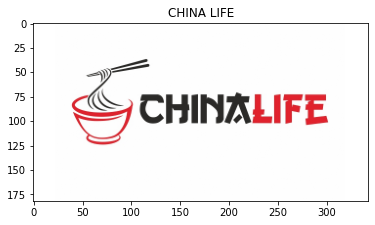

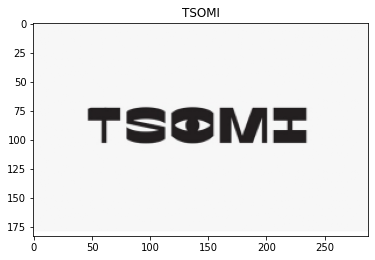

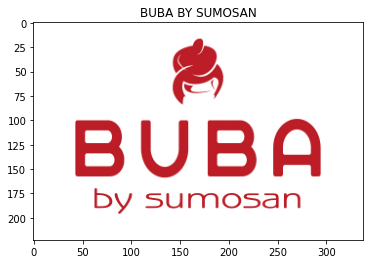

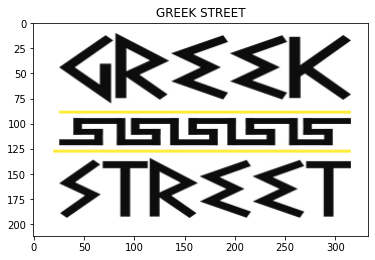

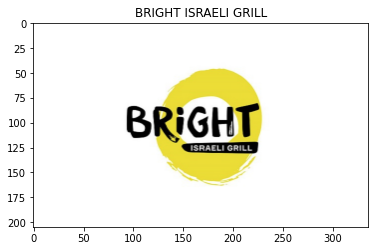

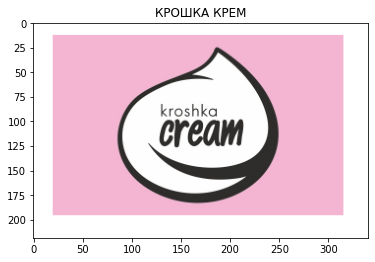

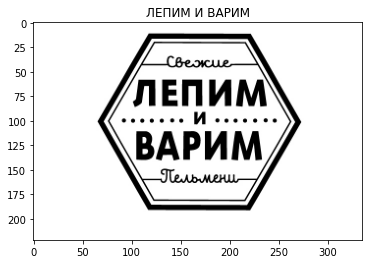

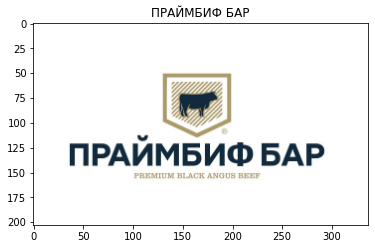

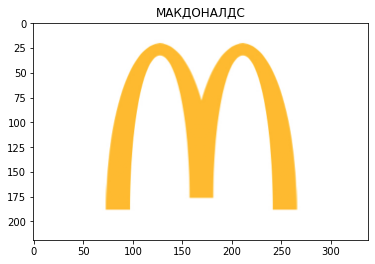

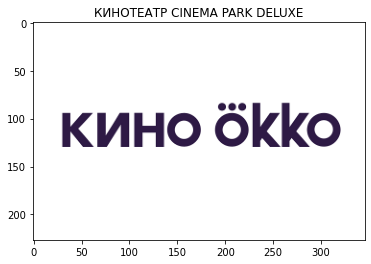

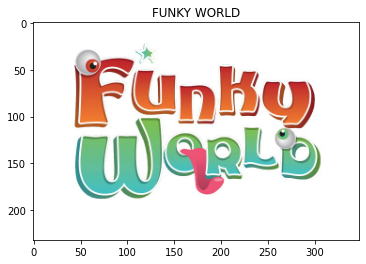

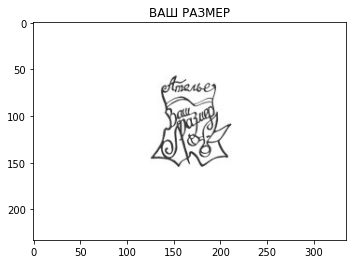

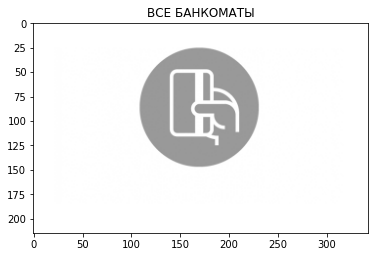

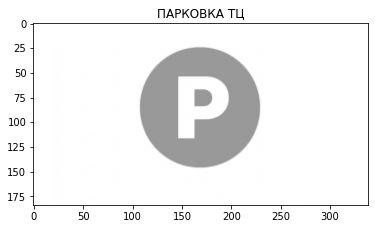

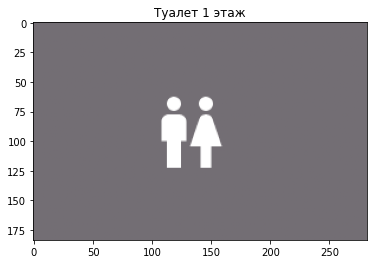

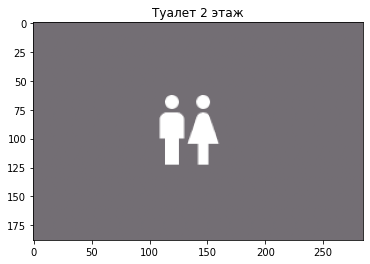

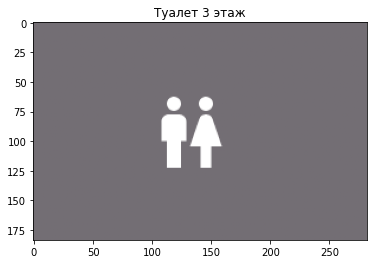

In [80]:
for i, name in enumerate(logo_dir_names[350:]):
    path = 'logo/{}'.format(name)
    org_name = df['Название длинное'][i+350]


    image = mpimg.imread(path)
    plt.imshow(image)
    plt.title(org_name)
    plt.show()

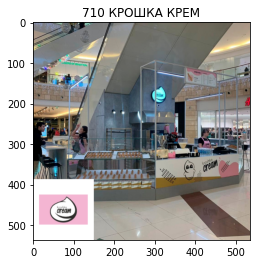

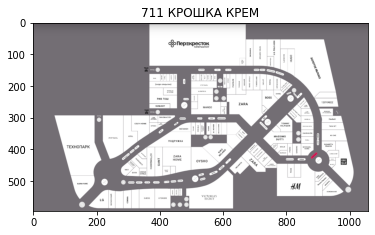

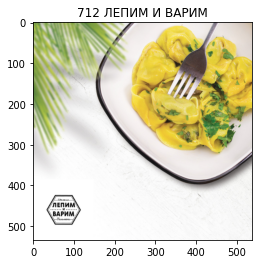

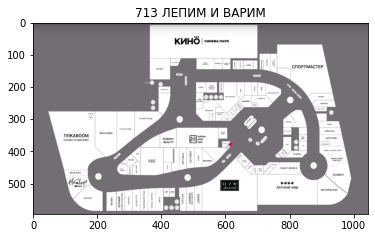

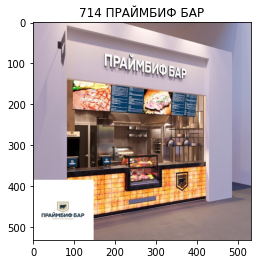

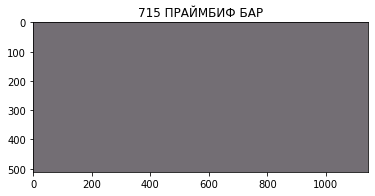

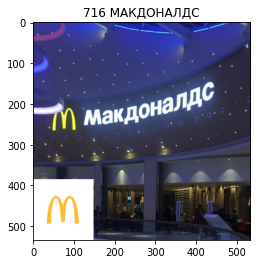

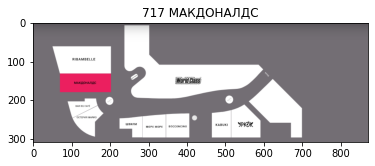

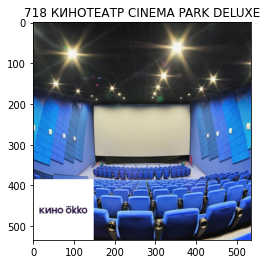

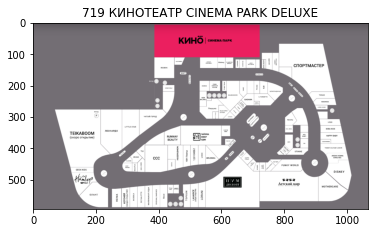

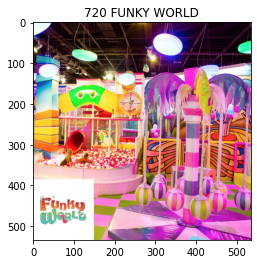

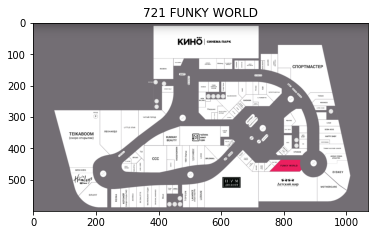

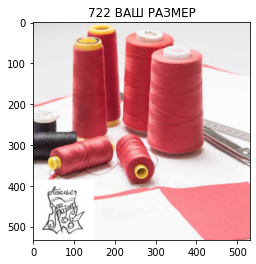

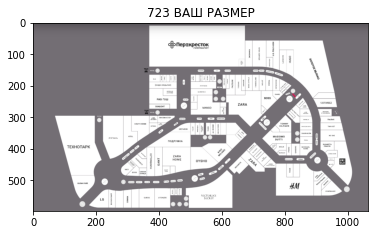

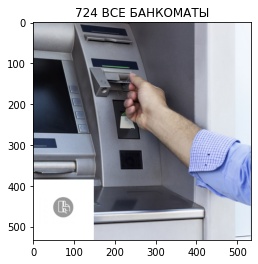

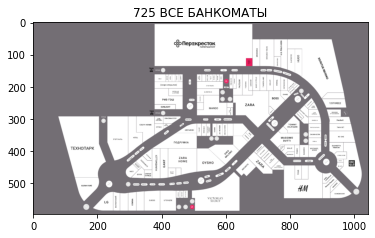

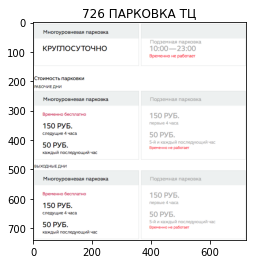

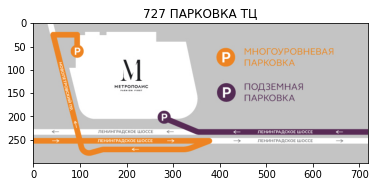

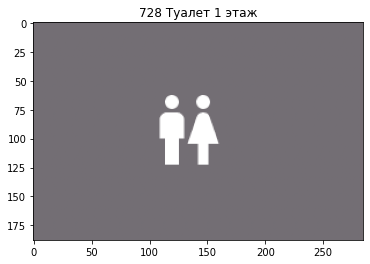

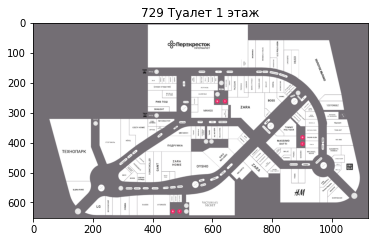

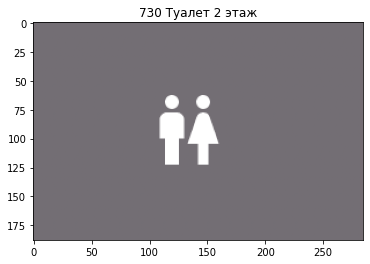

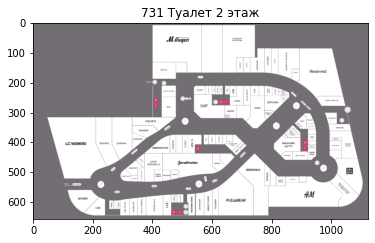

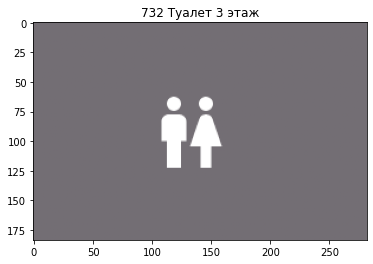

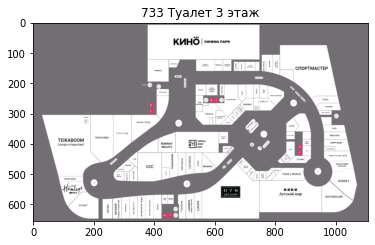

In [74]:
shift = 710
for i, name in enumerate(plans_dir_names[shift:]):
    path = 'plans_stores/{}'.format(name)
    org_name = df['Название длинное'][(i+shift)//2]


    image = mpimg.imread(path)
    plt.imshow(image)
    plt.title(str(i+shift) +" "+org_name)
    plt.show()

In [ ]:
for i, name in enumerate(logo_dir_names[280:]):
    path = 'logo/{}'.format(name)
    org_name = df['Название длинное'][i+280]


    image = mpimg.imread(path)
    plt.imshow(image)
    plt.title(org_name)
    plt.show()

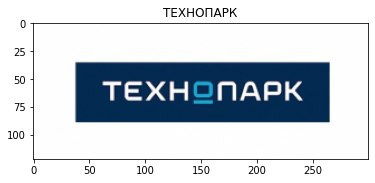

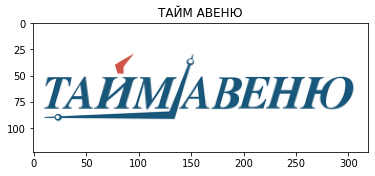

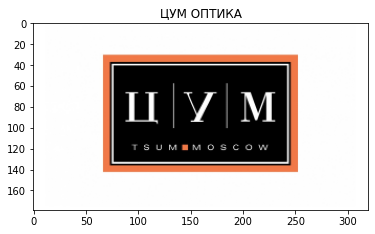

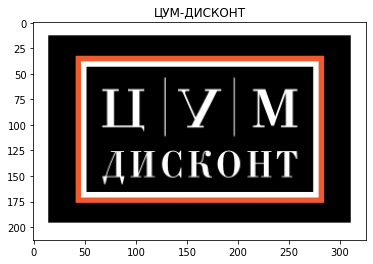

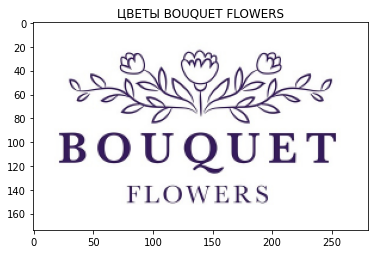

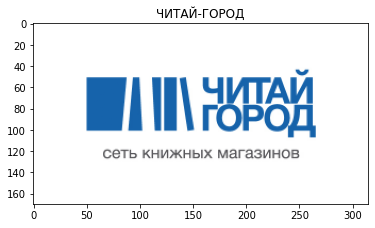

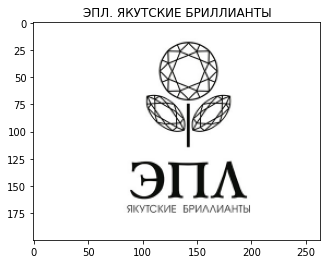

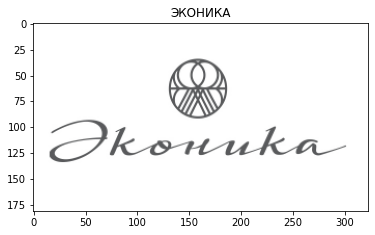

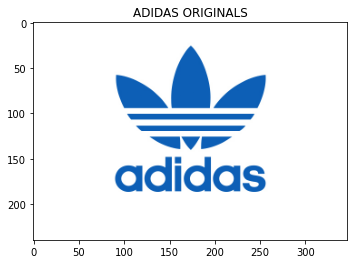

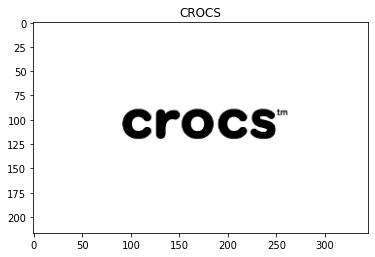

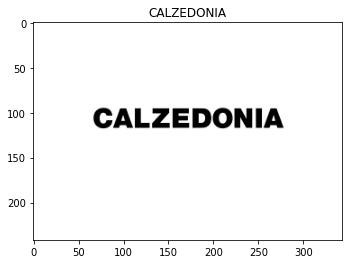

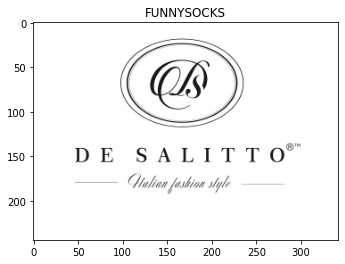

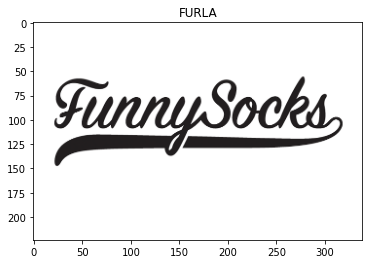

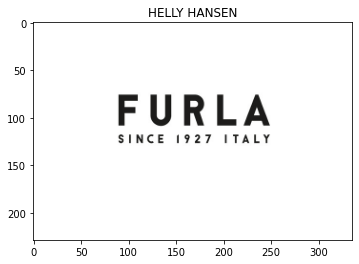

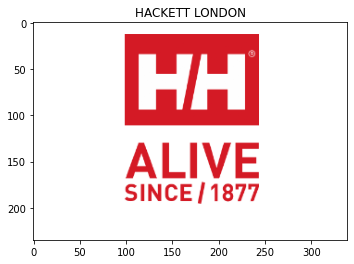

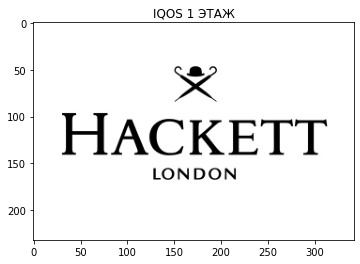

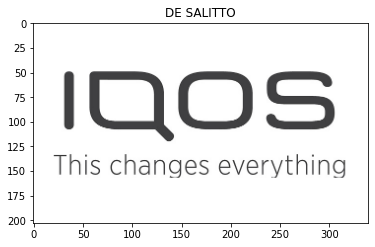

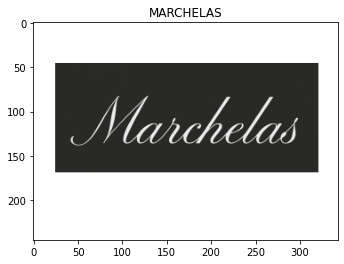

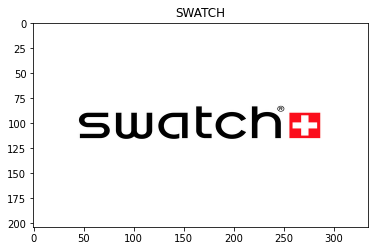

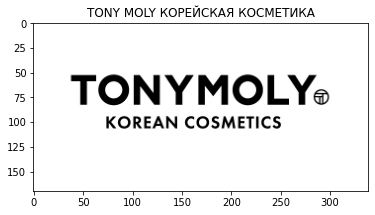

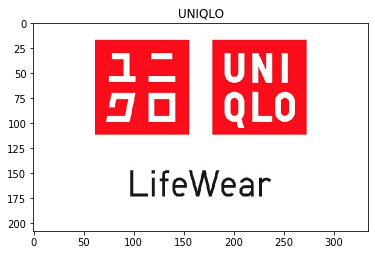

In [84]:
for i, name in enumerate(logo_dir_names[280:]):
    path = 'logo/{}'.format(name)
    org_name = df['Название длинное'][i+280]


    image = mpimg.imread(path)
    plt.imshow(image)
    plt.title(org_name)
    plt.show()

In [28]:
! pip install matplotlib

     |████████████████████████████████| 12.5MB 555kB/s eta 0:00:01
     |████████████████████████████████| 61kB 468kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [37]:
df

Название длинное              Название короткое  \
0                      1001 Платье                    1001 Платье   
1                        12Storeez                      12Storeez   
2                              5lb                            5lb   
3                          Albione                        Albione   
4                      ALL WE NEED                    ALL WE NEED   
..                             ...                            ...   
295                    IQOS 1 ЭТАЖ                    IQOS 1 ЭТАЖ   
296                     DE SALITTO                     DE SALITTO   
297                      MARCHELAS                      MARCHELAS   
298                         SWATCH                         SWATCH   
299  TONY MOLY КОРЕЙСКАЯ КОСМЕТИКА  TONY MOLY КОРЕЙСКАЯ КОСМЕТИКА   

                                        ключевые слова  Этаж  \
0             Российский производитель женских платьев   3.0   
1                      Российская марка женской одежды   3.0   
2    Спортивное питание, витамины, суперфуды, одежд...   3.0   
3    Итальянская марка классической мужской одежды ...   2.0   
4    Российский бренд женской одежды - безупречные ...   1.0   
..                                                 ...   ...   
295                          Система нагревания табака   1.0   
296          Итальянская торговая марка детской одежды   3.0   
297               Стильная женская одежда и аксессуары   1.0   
298     Торговая марка часов швейцарского производства   2.0   
299                 Косметический бренд из Южной Кореи   2.0   

                                     описание короткое  \
0    «1001 Платье» — российский производитель женск...   
1    12Storeez — российская марка женской одежды, с...   
2    5lb — сеть магазинов, предлагающих спортивное ...   
3    Albione — итальянская компания, производящая м...   
4       ALL WE NEED — то, что вам действительно нужно!   
..                                                 ...   
295  IQOS — инновационная система нагревания. Благо...   
296  De Salitto — молодая, динамично развивающаяся ...   
297           Marchelas – это стильная женская одежда.   
298  Swatch – самая известная торговая марка часов ...   
299  TONY MOLY это косметический бренд из Южной Кор...   

                                      Описание длинное  
0    «1001 Платье» — российский производитель женск...  
1    12Storeez — российская марка женской одежды, с...  
2    5lb — сеть магазинов, предлагающих спортивное ...  
3    Albione — итальянская компания, производящая м...  
4    ALL WE NEED — то, что вам действительно нужно!...  
..                                                 ...  
295  IQOS — инновационная система нагревания. Благо...  
296  Вот уже более 20 лет De Salitto является ведущ...  
297  Marchelas – это стильная женская одежда.\n\nЗд...  
298  Swatch – самая известная торговая марка часов ...  
299  TONY MOLY это косметический бренд из Южной Кор...  

[300 rows x 6 columns]

In [21]:
! pip install gensim

     |████████████████████████████████| 24.2MB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 112kB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 133kB 634kB/s eta 0:00:01
     |████████████████████████████████| 6.2MB 921kB/s eta 0:00:01
     |████████████████████████████████| 71kB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 552kB 390kB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.0.0-cp37-none-any.whl size=101342 sha256=2ac7c932d6261fbeff2a4b83caf4db825abba73ddcbb3e8e063aaa4c41187d24
  Stored in directory: /Users/alexey/Library/Caches/pip/wheels/27/65/38/8d7f5fe8d7afb4e4566587b2d1933cec185fba19257836c943
Successfully built smart-open
You should consider upgrading via the 'pip install --upgrade pip' command.


In [144]:
import numpy as np
import pickle

In [1]:
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import FastText as fText
fastvec = KeyedVectors.load_word2vec_format("/Users/alexey/Downloads/ft_native_300_ru_wiki_lenta_lower_case.vec")

In [145]:
kw_list = []
for kw in df.keywords.value_counts().index.tolist():
    kw_list+=kw.split(',')
    
all_key_words = sum([s.lower().split(' ') for s in kw_list], [])
all_key_words = list(filter(lambda x: x, all_key_words))
all_key_words = list(set(all_key_words))

from tqdm import tqdm

vocab_list = []
for w in tqdm(all_key_words):
    if w not in fastvec:
        print(w)
        continue
    vocab_list += fastvec.most_similar(w, topn=1000)
    
vocab = np.array(vocab_list)[:,0].tolist() + all_key_words
vec_dict = {}
for w in vocab:
    vec_dict[w] = fastvec[w]

100%|██████████| 89/89 [00:12<00:00,  7.15it/s]


In [146]:
len(vocab_list)

89000

In [147]:
pickle.dump(vec_dict, open('vec_dict.pkl', 'wb'))

In [148]:
! ls -lah vec_dict.pkl

-rw-r--r--  1 alexey  staff    66M 23 май 19:40 vec_dict.pkl


In [65]:
ph = 'мой член' 




In [68]:
!python -m deeppavlov install morpho_ru_syntagrus_pymorphy

2020-05-23 18:59:24.562 INFO in 'deeppavlov.core.common.file'['file'] at line 32: Interpreting 'morpho_ru_syntagrus_pymorphy' as '/Users/alexey/any_tc_bot/venv/lib/python3.7/site-packages/deeppavlov/configs/morpho_tagger/UD2.0/morpho_ru_syntagrus_pymorphy.json'
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/2d/b1/c9377d472a04fb9b84f59365560d68b5d868b589691f32545eb606b3be48/russian-tagsets-0.6.tar.gz
  Created wheel for russian-tagsets: filename=russian_tagsets-0.6-cp37-none-any.whl size=24635 sha256=f7292ddc6a529192acf8c9a65e55d1693b43dd450b4ac472267bde55d0f21ff1
  Stored in directory: /Users/alexey/Library/Caches/pip/wheels/e8/9d/dd/4679aca4031fdb0d3ad65e165ba5343e61441ed7ad587a08e6
Successfully built russian-tagsets
You should consider upgrading via the 'pip install --upgrade pip' command.


In [69]:
from deeppavlov import build_model, configs
model_morgj = build_model(configs.morpho_tagger.UD2_0.morpho_ru_syntagrus_pymorphy, download=True)

2020-05-23 18:59:41.631 INFO in 'deeppavlov.download'['download'] at line 117: Skipped http://files.deeppavlov.ai/deeppavlov_data/morpho_tagger/UD2.0/ru_syntagrus.tar.gz download because of matching hashes
2020-05-23 18:59:42.207 INFO in 'deeppavlov.download'['download'] at line 117: Skipped http://files.deeppavlov.ai/datasets/UD2.0_source/ru_syntagrus.tar.gz download because of matching hashes
2020-05-23 18:59:42.210 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /Users/alexey/.deeppavlov/models/morpho_tagger/UD2.0/ru_syntagrus/tag.dict]
2020-05-23 18:59:42.214 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /Users/alexey/.deeppavlov/models/morpho_tagger/UD2.0/ru_syntagrus/char.dict]


2020-05-23 18:59:48.573 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['morpho_tagger'] at line 166: 99 symbols, 711 tags in CharacterTagger


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2020-05-23 18:59:51.910 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['layer_utils'] at line 165: Model: "model"
2020-05-23 18:59:51.911 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['layer_utils'] at line 166: __________________________________________________________________________________________________
2020-05-23 18:59:51.912 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['layer_utils'] at line 163: Layer (type)                    Output Shape         Param #     Connected to                     
2020-05-23 18:59:51.912 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['layer_utils'] at line 168: ==================================================================================================
2020-05-23 18:59:51.914 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['layer_utils'] at line 163: input_1 (InputLayer)            [(None, None, 32)]   0                                            
2020-05-23 18:59:51.915 INFO in 'deeppavlov.model

2020-05-23 18:59:51.949 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['layer_utils'] at line 163: concatenate_1 (Concatenate)     (None, None, 1228)   0           highway[0][0]                    
2020-05-23 18:59:51.950 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['layer_utils'] at line 163:                                                                  dense_1[0][0]                    
2020-05-23 18:59:51.951 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['layer_utils'] at line 232: __________________________________________________________________________________________________
2020-05-23 18:59:51.953 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['layer_utils'] at line 163: dropout (Dropout)               (None, None, 1228)   0           concatenate_1[0][0]              
2020-05-23 18:59:51.954 INFO in 'deeppavlov.models.morpho_tagger.morpho_tagger'['layer_utils'] at line 232: ________________________________________________________________

In [154]:


def p2vec(phrease, drop_non_adj_nouns):
    def norm(x):
        norm_c = np.sum(np.array(x)**2)
        if not norm_c:
            return  np.array(x)
        return  np.array(x)/np.sqrt(norm_c)
    zero_arr = np.zeros(300)
    
    if drop_non_adj_nouns:
        for parse in model_morgj([phrease]):
            ph_list = [el.split('\t') for el in parse.split('\n')[:-1] if el.split('\t')[2] in ['ADJ','NOUN']]
            ph_list = [el[1].lower() for el in ph_list]
    else:
        ph_list = phrease.lower().strip().split(' ')
    
    res_list = [zero_arr]
    for token in ph_list:
        if token in vec_dict:
            res_list.append(vec_dict[token])


    return norm(np.array(res_list).mean(0))

In [164]:
msg_vec = p2vec('женская одежда', drop_non_adj_nouns=True)

res_dict = {}
for ind, row in df.iterrows():
    kw_list = str(row['keywords']).split(',')
    for kw in kw_list:
        res_dict[kw] = (p2vec(kw, drop_non_adj_nouns=False)*msg_vec).sum()

In [165]:
pd.Series(res_dict).sort_values()
    

nan                             0.000000
суши                            0.093189
 суши                           0.093189
фо                              0.113425
ремонт apple                    0.126508
                                  ...   
 итальянская одежда             0.748344
молодежная одежда               0.806079
 мужская классическая одежда    0.921781
мужская одежда                  0.962407
женская одежда                  1.000000
Length: 82, dtype: float64

In [103]:
'фо' in vec_dict

True

In [108]:
p2vec('фо', drop_non_adj_nouns=False)

/Users/alexey/any_tc_bot/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [77]:
for pred, parse in zip(sentences, model_morgj(sentences)):
    print(parse)

1	где	ADV	Degree=Pos
2	тут	ADV	Degree=Pos
3	рыбный	ADJ	Case=Nom|Degree=Pos|Gender=Masc|Number=Sing
4	ресторанчик	NOUN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing
5	?	PUNCT	_



In [81]:
model_morgj(sentences[0])

['1\tг\tNOUN\tAnimacy=Inan|Case=Nom|Gender=Masc|Number=Sing\n',
 '1\tд\tADV\tDegree=Pos\n',
 '1\tе\tNOUN\tAnimacy=Inan|Case=Nom|Gender=Neut|Number=Sing\n',
 '\n',
 '1\tт\tNOUN\tAnimacy=Inan|Case=Acc|Gender=Masc|Number=Sing\n',
 '1\tу\tADP\t_\n',
 '1\tт\tNOUN\tAnimacy=Inan|Case=Acc|Gender=Masc|Number=Sing\n',
 '\n',
 '1\tр\tNOUN\tAnimacy=Inan|Case=Nom|Gender=Fem|Number=Sing\n',
 '1\tы\tNOUN\tAnimacy=Inan|Case=Nom|Gender=Neut|Number=Sing\n',
 '1\tб\tPART\tMood=Cnd\n',
 '1\tн\tADJ\tDegree=Pos|Gender=Fem|Number=Sing|Variant=Short\n',
 '1\tы\tNOUN\tAnimacy=Inan|Case=Nom|Gender=Neut|Number=Sing\n',
 '1\tй\tPUNCT\t_\n',
 '\n',
 '1\tр\tNOUN\tAnimacy=Inan|Case=Nom|Gender=Fem|Number=Sing\n',
 '1\tе\tNOUN\tAnimacy=Inan|Case=Nom|Gender=Neut|Number=Sing\n',
 '1\tс\tADP\t_\n',
 '1\tт\tNOUN\tAnimacy=Inan|Case=Acc|Gender=Masc|Number=Sing\n',
 '1\tо\tADP\t_\n',
 '1\tр\tNOUN\tAnimacy=Inan|Case=Nom|Gender=Fem|Number=Sing\n',
 '1\tа\tCCONJ\t_\n',
 '1\tн\tADJ\tDegree=Pos|Gender=Fem|Number=Sing|Variant=Shor

In [80]:
p2vec(' '.join(ch_rechs))

array([ 0.02696894, -0.03946882,  0.01796185, -0.09574243, -0.07316196,
       -0.11658519, -0.00907528, -0.02579794,  0.00853763,  0.12598308,
       -0.01050581,  0.05203326,  0.05044036,  0.04102897,  0.08237332,
        0.09397403, -0.0189811 , -0.0105776 , -0.01269979, -0.0368328 ,
        0.01834946,  0.02882802,  0.0053393 ,  0.02789216,  0.00541465,
       -0.05570995, -0.00895475, -0.02089091, -0.0274712 , -0.05808581,
        0.03324852, -0.14456043, -0.04629498, -0.00378403, -0.0027936 ,
        0.02470905, -0.03062722,  0.06603193, -0.05767593,  0.02201817,
        0.07076769, -0.01799548, -0.03387071, -0.08605492, -0.01853366,
        0.00787249, -0.05900008,  0.05273277,  0.0337799 ,  0.00770264,
        0.04920592, -0.09097856, -0.08637154, -0.01935755, -0.020204  ,
        0.05856319, -0.06711984, -0.09540373,  0.02261987, -0.02200209,
       -0.05373723, -0.0744137 ,  0.03172102,  0.00453548,  0.08890202,
       -0.00973464, -0.03040326,  0.05321015,  0.04626052,  0.07

from gensim.models.word2vec import Word2Vec
import gensim

w2v_fpath = "/Users/alexey/all.norm-sz500-w10-cb0-it3-min5.w2v"
w2v = gensim.models.KeyedVectors.load_word2vec_format(w2v_fpath, binary=True, unicode_errors='ignore')
w2v.init_sims(replace=True)
for word, score in w2v.most_similar(u"дерево"):
    print (word, score)

100%|██████████| 79/79 [00:11<00:00,  7.15it/s]


790000

In [54]:
vec_dict

{'костюма': array([ 0.15127  ,  0.32968  ,  0.090823 , -0.10025  ,  0.12118  ,
        -0.037359 , -0.11729  ,  0.016345 , -0.053411 ,  0.60408  ,
         0.11741  ,  0.035597 ,  0.075357 ,  0.27057  , -0.21954  ,
         0.086539 ,  0.17152  , -0.24582  ,  0.16482  ,  0.15795  ,
        -0.18514  ,  0.099467 , -0.075891 ,  0.0033359,  0.17609  ,
        -0.42822  , -0.21666  , -0.37067  , -0.044951 , -0.5433   ,
         0.35039  , -0.013827 ,  0.44604  ,  0.52467  , -0.16873  ,
        -0.096111 ,  0.17602  ,  0.10403  , -0.20421  ,  0.51285  ,
         0.0058309, -0.075322 , -0.0025752,  0.020429 , -0.019024 ,
        -0.57475  , -0.51979  ,  0.17665  , -0.45066  ,  0.059839 ,
         0.014518 ,  0.14825  ,  0.66983  , -0.20854  ,  0.07975  ,
         0.26724  ,  0.21116  , -0.40578  ,  0.059578 ,  0.44992  ,
         0.20066  ,  0.59725  , -0.13192  ,  0.20328  ,  0.30711  ,
         0.033138 ,  0.23996  ,  0.096716 , -0.18814  , -0.25168  ,
         0.32192  ,  0.097053 ,  0.03